### Dummy Classifier

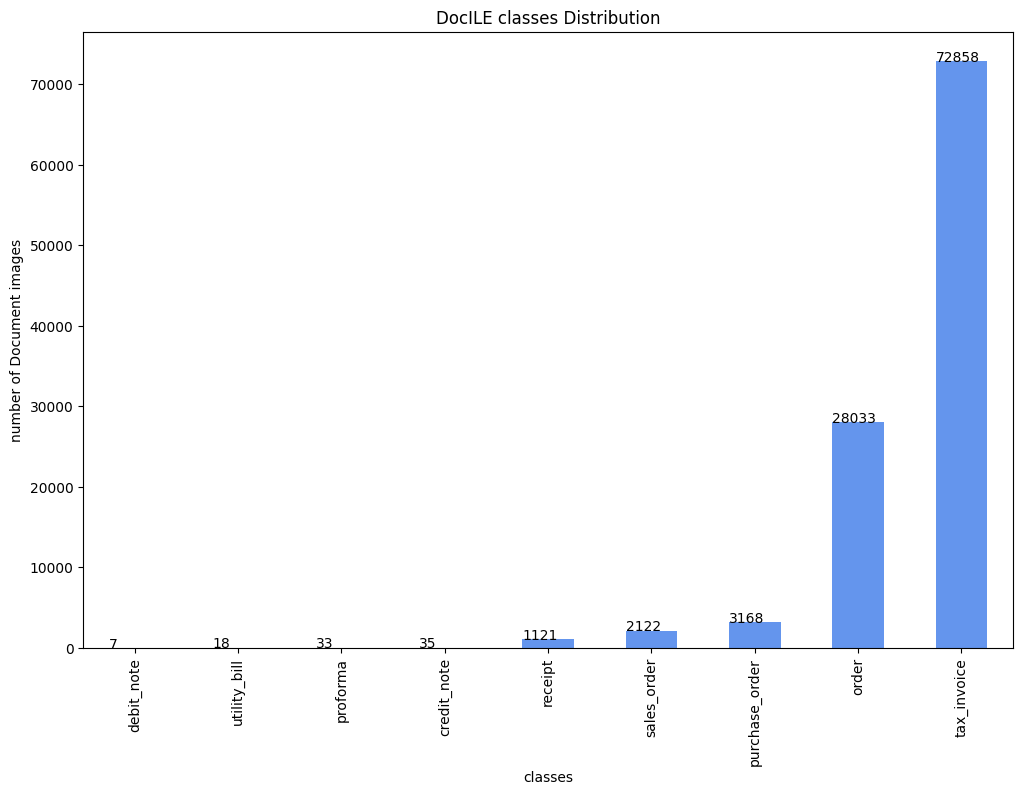

As can be seen in the class distribution, the distribution of the documents is very unbalanced. This also means that the accuracy is less meaningful. Therefore, different dummy classifiers are tested experimentally and compared to the other methods.

### Import required libaries

In [21]:
import os
import platform
import random
import cv2
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt 
import seaborn as sns

In [22]:
img_size = 224
batch_size = 32
epochs = 100
train_size = 0.7
val_size = 0.2
test_size = 0.1
seed = 4321
channels = 3
learning_rate = 0.00001

In [23]:
d = '/Users/sep/Documents/HAW/Vorlesung/HP/Hauptprojekt/Daten_sorted.nosync/'
classes = (os.listdir(d))
if platform.system() == 'Darwin': 
    if ".DS_Store" in classes:
        classes.remove(".DS_Store")

In [24]:

total_set = []
total_labels = []
for root, dirs, files in os.walk(d):
    for file in files:
        if file.endswith(".jpg") and file != '.DS_Store':
            path = os.path.join(root, file)
            total_set.append(path)
            total_labels.append(label)
            

# Return image class based on list entry (path)         
def getClass(img):
    return img.split(os.path.sep)[-2]


print(total_set[0])
print('GetClass : ', getClass(total_set[0]))
print('Label : ', total_labels[0])

/Users/sep/Documents/HAW/Vorlesung/HP/Hauptprojekt/Daten_sorted.nosync/order/synthetic-8c54fad775a242dfa2384288-466(1).jpg
GetClass :  order
Label :  utility_bill


/Users/sep/Documents/HAW/Vorlesung/HP/Hauptprojekt/Daten_sorted.nosync/order/synthetic-c62990cb4561487eb20824e0-411(1).jpg


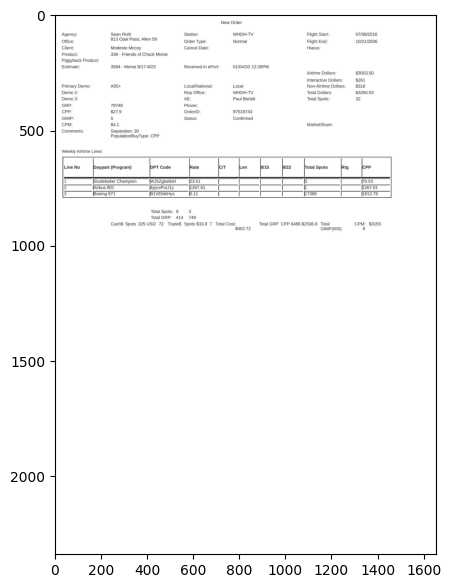

/Users/sep/Documents/HAW/Vorlesung/HP/Hauptprojekt/Daten_sorted.nosync/tax_invoice/synthetic-f079d766ab2841b4956aef79-930(1).jpg


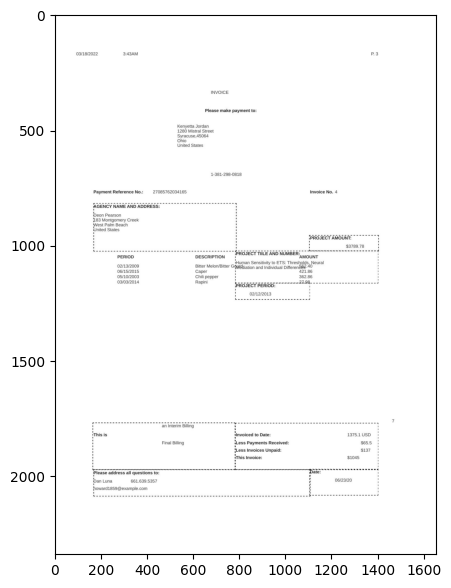

/Users/sep/Documents/HAW/Vorlesung/HP/Hauptprojekt/Daten_sorted.nosync/tax_invoice/synthetic-b764f6cb46b44fd3886914ec-498(1).jpg


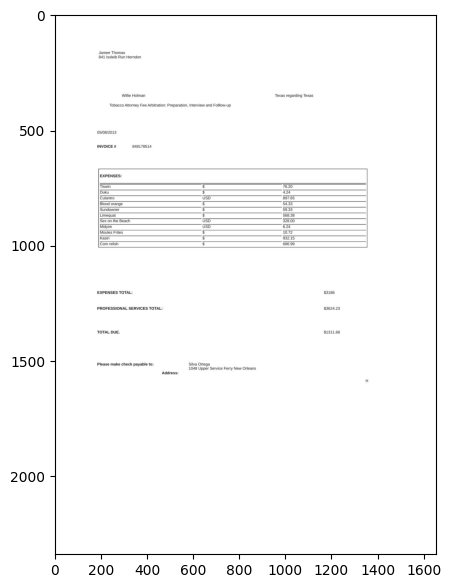

In [25]:
random.Random(seed).shuffle(total_set)

for ima in total_set[0:3] :
    print(ima)
    img = mpimg.imread(ima)
    plt.figure(figsize=(7,7))
    imgplot = plt.imshow(img, cmap="gray")
    plt.show()

In [26]:
# Get data and separate it in sets
total_len = len(total_set)
index = 0

train_set = []
train_label = []

val_set = []
val_label = []

test_set = []
test_label = []


for i in total_set[0: int(total_len*train_size)] :
    train_set.append(i)
    train_label.append(getClass(i))
    
index = int(total_len*train_size)+1
    
for i in total_set[index: int(index + total_len*val_size)] :
    val_set.append(i)
    val_label.append(getClass(i))
    
index = int(index + total_len*val_size)+1 

for i in total_set[index: total_len] :
    test_set.append(i)
    test_label.append(getClass(i))

print(val_set[200])
print(val_label[200])

/Users/sep/Documents/HAW/Vorlesung/HP/Hauptprojekt/Daten_sorted.nosync/tax_invoice/synthetic-aca54467052f4df3b353316e-999(1).jpg
tax_invoice


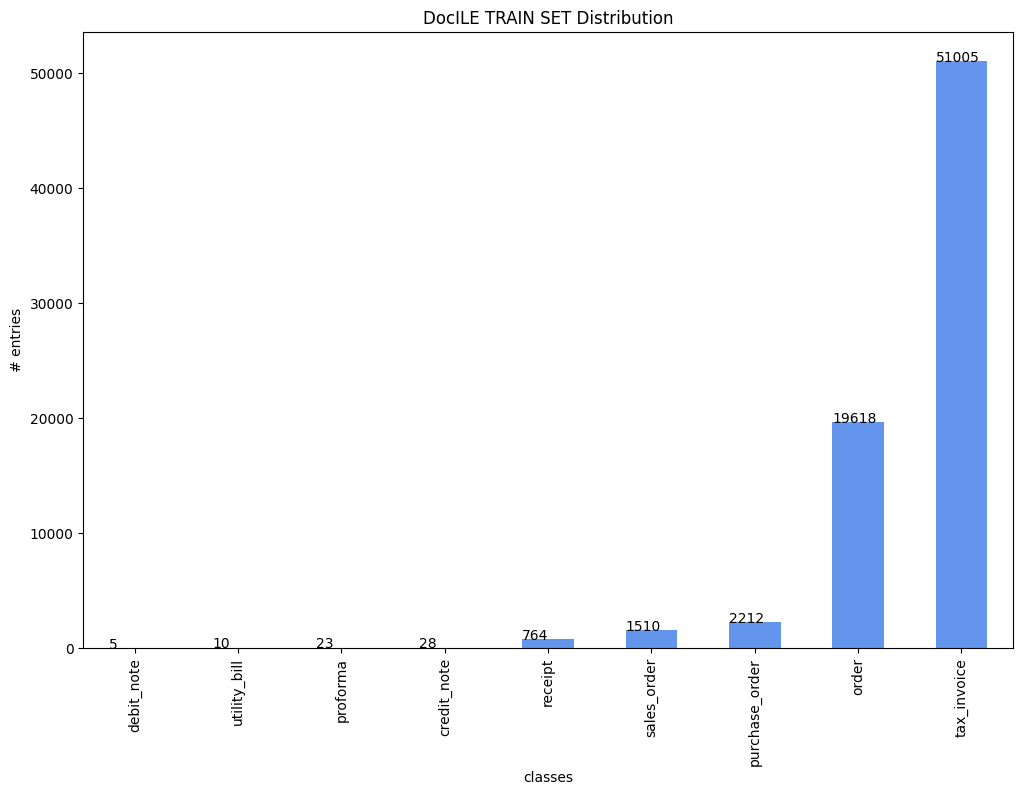

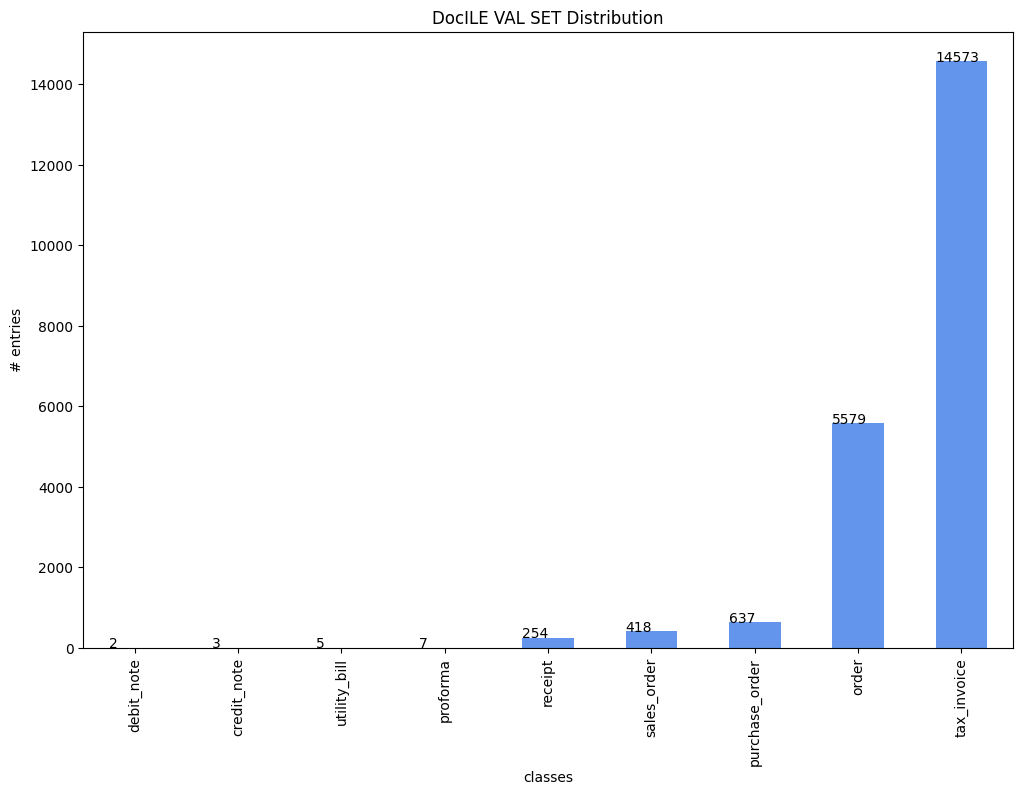

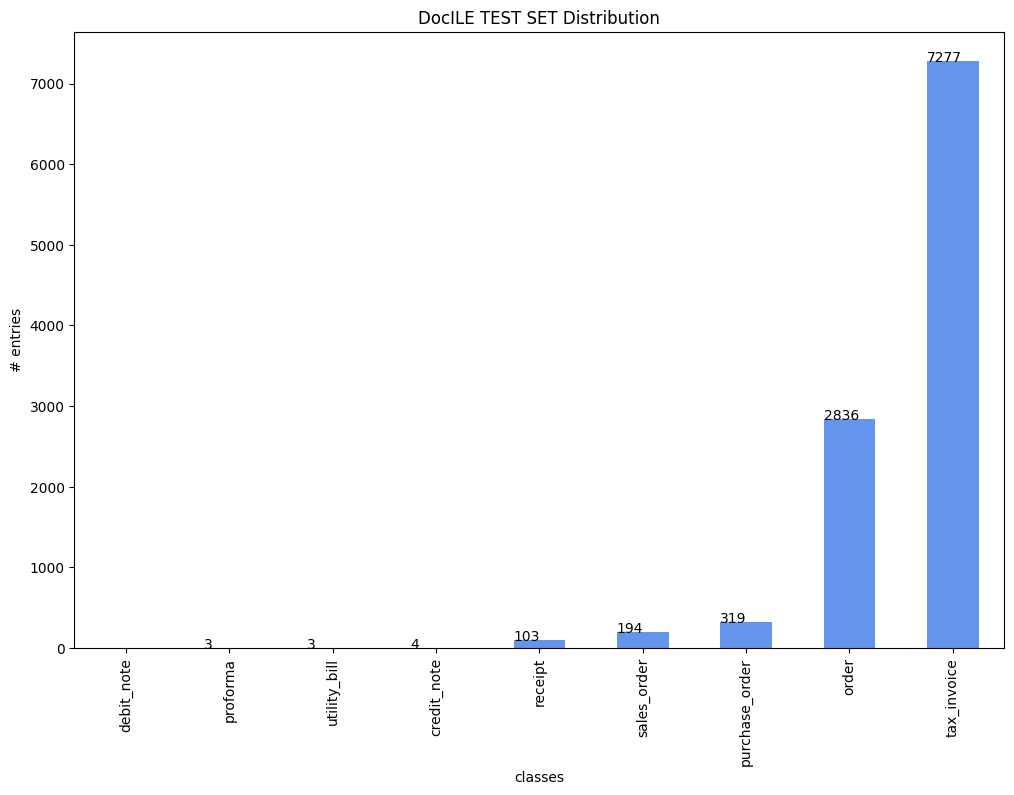

In [27]:
#################################################
# TRAIN SET
instances = [0] * len(classes)
for index, val in enumerate(classes) :
    for e in train_set :
        if(val == getClass(e)) :
            instances[index] += 1

            
df = pd.DataFrame({'classes':classes, 'entries':instances})
ax = df.sort_values(by='entries', ascending=True).plot.bar(x='classes', y='entries', color='cornflowerblue',legend=False, figsize=(12,8))
ax.set_title('DocILE TRAIN SET Distribution')
ax.set_ylabel("# entries")
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()-20))

#################################################
# VAL SET
instances = [0] * len(classes)
for index, val in enumerate(classes) :
    for e in val_set :
        if(val == getClass(e)) :
            instances[index] += 1

            
df = pd.DataFrame({'classes':classes, 'entries':instances})
ax = df.sort_values(by='entries', ascending=True).plot.bar(x='classes', y='entries', color='cornflowerblue',legend=False, figsize=(12,8))
ax.set_title('DocILE VAL SET Distribution')
ax.set_ylabel("# entries")
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()-3))
    
#################################################
# TEST SET
instances = [0] * len(classes)
for index, val in enumerate(classes) :
    for e in test_set :
        if(val == getClass(e)) :
            instances[index] += 1

            
df = pd.DataFrame({'classes':classes, 'entries':instances})
ax = df.sort_values(by='entries', ascending=True).plot.bar(x='classes', y='entries', color='cornflowerblue',legend=False, figsize=(12,8))
ax.set_title('DocILE TEST SET Distribution')
ax.set_ylabel("# entries")
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()-8))

In [28]:
def process_images(img_set) : 
    processed_img = []

    for i in range(len(img_set)) :
        processed_img.append(cv2.resize(cv2.imread(img_set[i], cv2.IMREAD_COLOR), (img_size, img_size)))
    
    return processed_img
    
data_train = process_images(train_set)
data_test = process_images(test_set)
data_val = process_images(val_set)

train images shape :  (75175, 224, 224, 3)
train labels shape :  (75175, 9)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
test shape :  (10739, 224, 224, 3)
(10739, 9)
valdiation shape :  (21478, 224, 224, 3)
(21478, 9)
order
[0 0 1 0 0 0 0 0 0]
['credit_note' 'debit_note' 'order' 'proforma' 'purchase_order' 'receipt'
 'sales_order' 'tax_invoice' 'utility_bill']


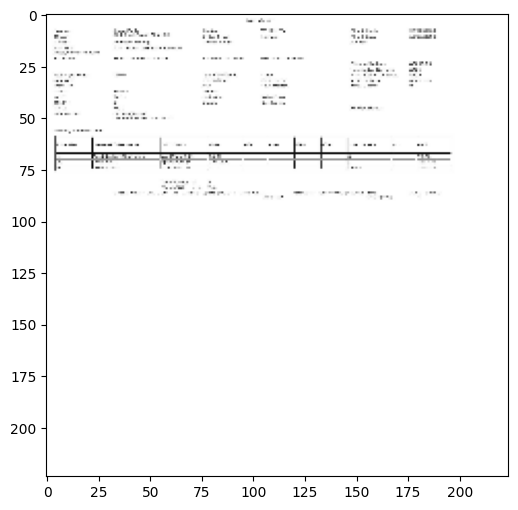

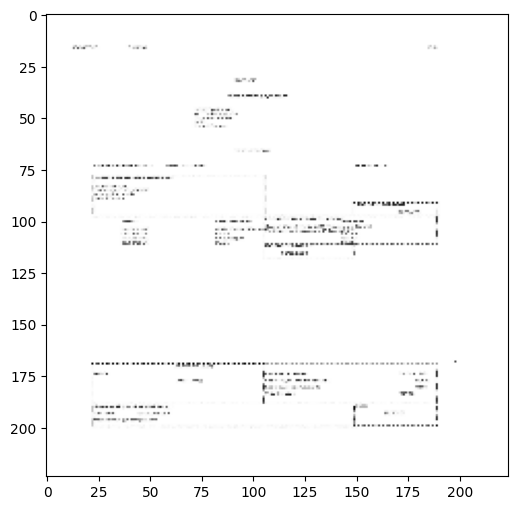

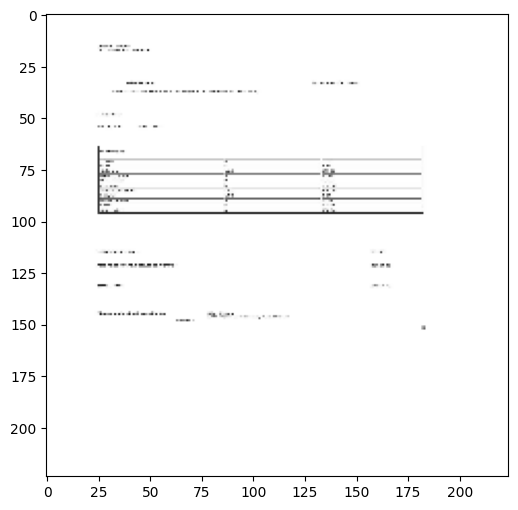

In [29]:
lb = LabelBinarizer()
lb.fit(list(classes))

x_train = np.array(data_train)
y_train =lb.transform(np.array(train_label))

x_test = np.array(data_test)
y_test = lb.transform(np.array(test_label))

x_val = np.array(data_val)
y_val = lb.transform(np.array(val_label))

print("train images shape : ", x_train.shape)
print("train labels shape : ", y_train.shape)
print(x_train[0])

print("test shape : ", x_test.shape)
print(y_test.shape)
print("valdiation shape : ", x_val.shape)
print(y_val.shape)


for i in range(3) :
    plt.figure(figsize=(6,6))
    imgplot = plt.imshow(x_train[i])

print(train_label[0])
print(y_train[0])
print(lb.classes_)

### Train the model

In [30]:
strategies = ['most_frequent', 'stratified', 'uniform', 'constant']
  
test_scores = []
for s in strategies:
    if s =='constant':
        #Predict "tax_invoice" every time
        dclf = DummyClassifier(strategy = s, random_state = 0, constant = [0,0,0,0,0,0,0,1,0])
    else:
        dclf = DummyClassifier(strategy = s, random_state = 0)
    dclf.fit(x_train, y_train)
    score = dclf.score(x_test, y_test)
    test_scores.append(score)

print("score: ", test_scores)

score:  [0.677623614861719, 0.337554707142192, 0.0016761337182232983, 0.677623614861719]


### Analyze results

In [31]:
np.ma.shape(x_test)

(10739, 224, 224, 3)

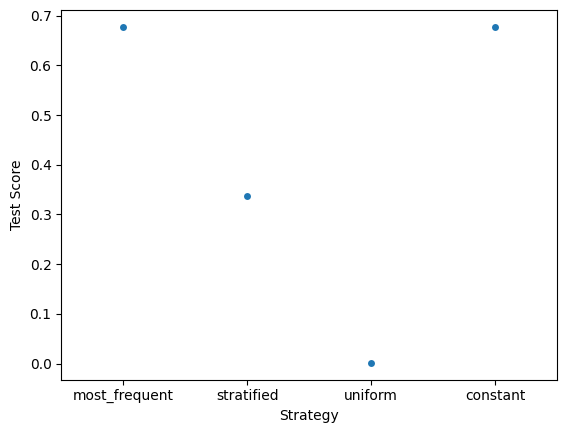

In [32]:
ax = sns.stripplot(x = strategies, y = test_scores)
ax.set(xlabel ='Strategy', ylabel ='Test Score')
plt.show()
